In [2]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Solution to Question : 1

In [5]:
data = pd.read_csv("goog.csv",header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])
data.head()

,time,value
1,1,392.830017
2,2,392.512085
3,3,397.305908
4,4,398.011322
5,5,400.490204


# Solution to Question : 2

Time Series:  A collection of observations along with time spaced intervals or a given time point. 
For example, the closing price of stock over past few months, height of a certain sample of population on a given time like day or month. Too long or too short time period can create a bias in time period. 
The time series is generally used for forecasting the future based on current & past patter and trends.

Cross Sectional: Collection of observations from different data points at the same time.
For example, considering the closing stock price of multiple companies of a given day would be a cross sectional data. 
Samples are constructed by collecting the data interest across a range of observational units, people, objects at the same time. We cannot perform forecasting on cross sectional data, we can only have prediction done on such data sets.

# Solution to Question : 3

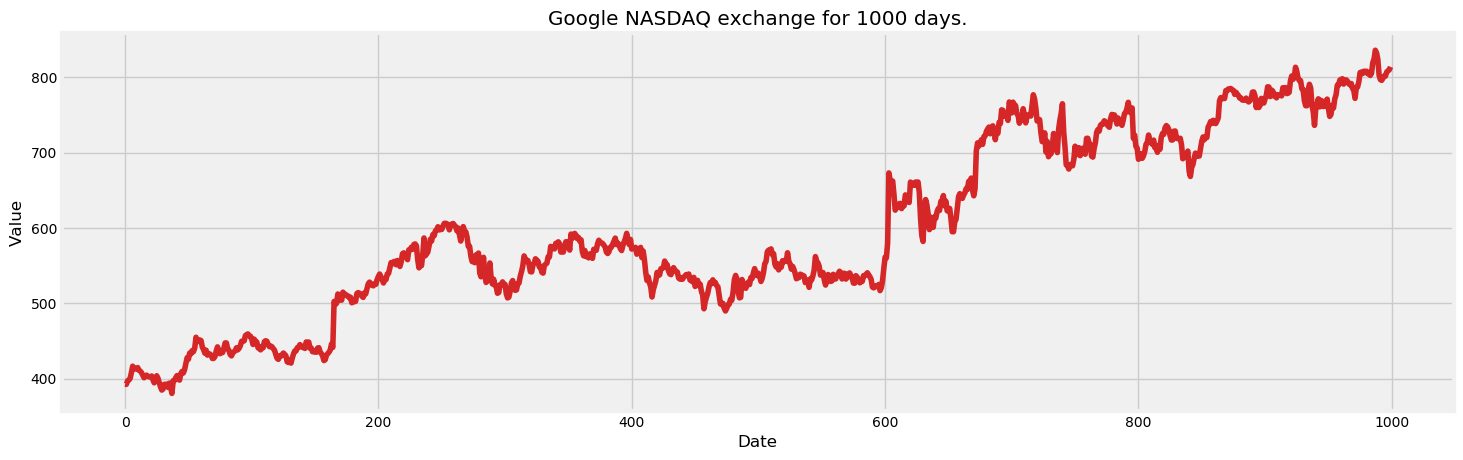

In [5]:
def plot_df(goog, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(goog, x=goog.index, y=goog.value, title='Google NASDAQ exchange for 1000 days.')

# There is no clear trend showing in the plot below
# Shows stationarity

Observations :
The Trend seems to be a long term increase.
However, as it's a trading data there will be volatility over time With a longer outlook we may be able to see some seasonality and cycles occuring as well

# Answer to Question 4 :

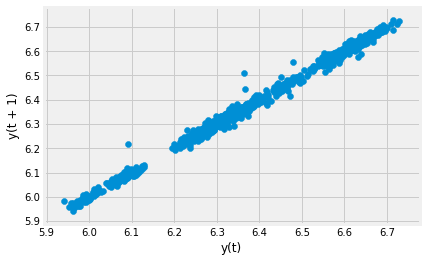

In [8]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from pandas.plotting import lag_plot
lag_plot(np.log(data['value']))

# Answer to Question 5  :

Stationarity and it's significance for time series forecasting :

In time series data which has constant mean, variance, covariance, autocorrelation over time is stationarity. 
The algorithm used in time series assumes that the data is stationarized. 
It makes it easy for forecasting. 

The forecasting for stationarized series can be untransformed by obtaining forecast for original series. 
Stationarizing it time series through differencing is an important for fitting in models like ARIMA.

# Answer to Question 6 :

In [9]:
import statsmodels
from statsmodels.tsa.stattools import adfuller
import pandas as pd
class StationarityTests:
    def __init__(self, significance=.05):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None
    def ADF_Stationarity_Test(self, timeseries, printResults = True):
        #Dickey-Fuller test:
        adfTest = adfuller(timeseries, autolag='AIC')
        
        self.pValue = adfTest[1]
        
        if (self.pValue<self.SignificanceLevel):
            self.isStationary = True
        else:
            self.isStationary = False
        
        if printResults:
            dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
            #Add Critical Values
            for key,value in adfTest[4].items():
                dfResults['Critical Value (%s)'%key] = value
            print('Augmented Dickey-Fuller Test Results:')
            print(dfResults)

sTest = StationarityTests()
sTest.ADF_Stationarity_Test(data['value'], printResults = True)

print("Is the time series stationary? {0}".format(sTest.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -0.984016
P-Value                   0.759049
# Lags Used               4.000000
# Observations Used     995.000000
Critical Value (1%)      -3.436939
Critical Value (5%)      -2.864449
Critical Value (10%)     -2.568319
dtype: float64
Is the time series stationary? False


# Answer to Question : 7

In [26]:
from statsmodels.tsa.stattools import adfuller

print(" > Is the data stationary ?")
dftest = adfuller(data.value, autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    
print("\n > Is the de-trended data stationary ?")
dftest = adfuller(data.value.dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    
print("\n > Is the 12-lag differenced de-trended data stationary ?")
dftest = adfuller(data.value.dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))


 > Is the data stationary ?
Test statistic = -0.984
P-value = 0.759
Critical values :
	1%: -3.4369391965679257 - The data is not stationary with 99% confidence
	5%: -2.86444914142694 - The data is not stationary with 95% confidence
	10%: -2.5683189679553546 - The data is not stationary with 90% confidence

 > Is the de-trended data stationary ?
Test statistic = -0.984
P-value = 0.759
Critical values :
	1%: -3.4369391965679257 - The data is not stationary with 99% confidence
	5%: -2.86444914142694 - The data is not stationary with 95% confidence
	10%: -2.5683189679553546 - The data is not stationary with 90% confidence

 > Is the 12-lag differenced de-trended data stationary ?
Test statistic = -0.984
P-value = 0.759
Critical values :
	1%: -3.4369391965679257 - The data is not stationary with 99% confidence
	5%: -2.86444914142694 - The data is not stationary with 95% confidence
	10%: -2.5683189679553546 - The data is not stationary with 90% confidence


The results show that the series is not actually stationary. In this case, the P-Value from our ADF test is higher than our 5% significance level, therefore we fail to reject the Null hypothesis : indicating stationarity does not exist.

# Answer to Question 8:

ADF Test :
The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). 
The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


# Answer to Question 9:

Seasonality: In a given time series data, when it has patterns of ups and downs of fluctuations due to seasonal variations with a time of a day, week, month and year. 
For example: sales of warm clothing during winter or high volumes sales of FMCG at the beginning of the month. Seasonality is always fixed and known pattern.

Cyclicality: When a time series data has not fixed pattern with unusual rise and fall. 
If the fluctuations are not of fixed period, they are cyclic. 
The average length of cycles is longer than seasonal patterns. 
For example: 5 years of economic growth, followed by 2 years of slump, and again 7 years of growth. 


# Answer to Question 10:

Each time series can be thought as a mix between several parts :

a) A trend (upward or downwards movement of the curve on the long term)
b) A seasonal component
c) Residuals

# Answer to Question 11:

In [15]:
result1 = seasonal_decompose(data['value'], model='additive', freq = 12)

C:\Users\VISHAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


In [17]:
result2 = seasonal_decompose(data['value'], model='multiplicative', freq = 12)

C:\Users\VISHAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


# Answer to Question 12:

<Figure size 432x288 with 0 Axes>

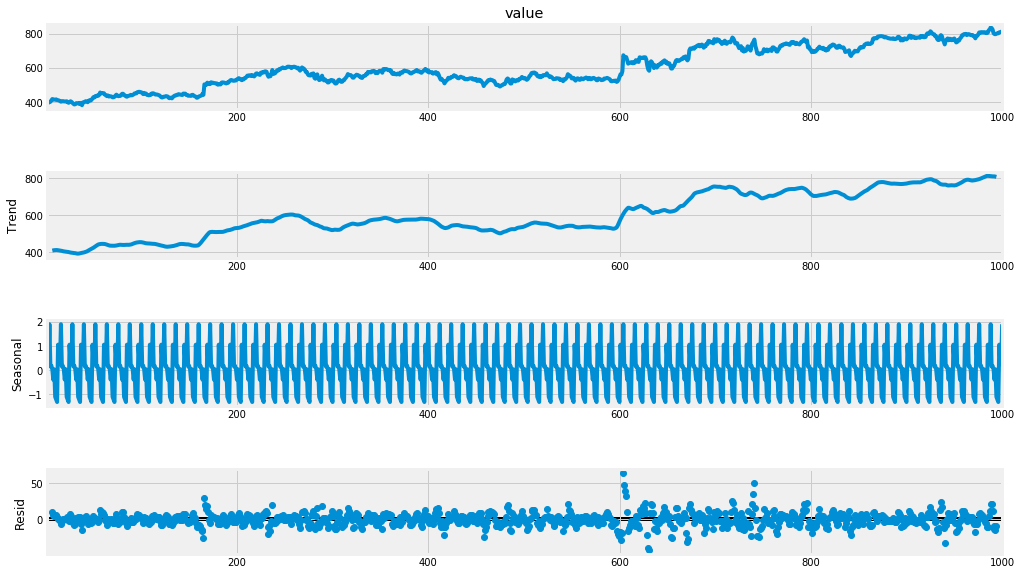

In [18]:
# Additive time series model : split into trend + seasonality + error residuals
fig = plt.figure()  
fig = result1.plot()  
fig.set_size_inches(16, 9)

<Figure size 432x288 with 0 Axes>

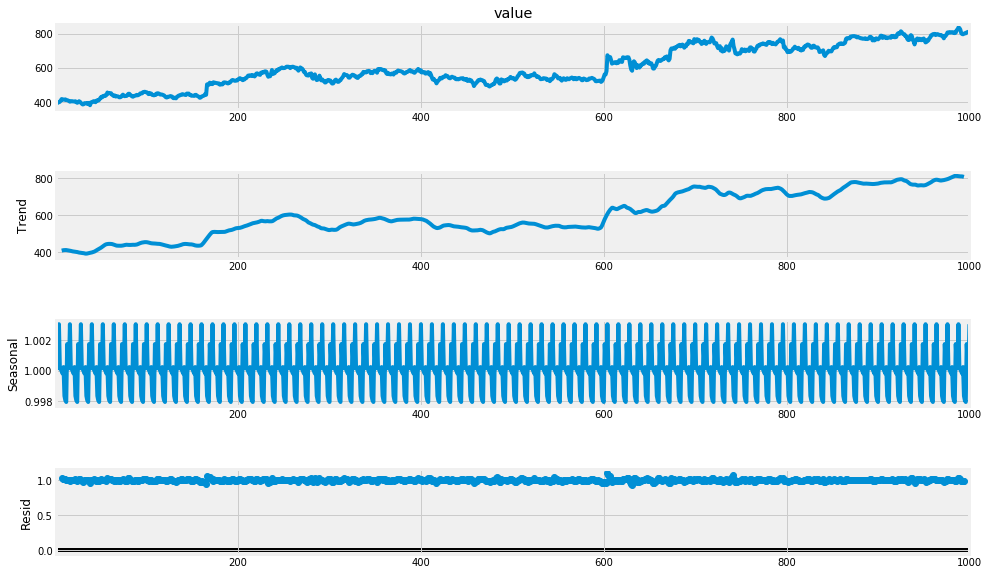

In [19]:
# Multiplicative time series model : split into trend + seasonality + error residuals
fig = plt.figure()  
fig = result2.plot()  
fig.set_size_inches(16, 9)

Observations :
Our time series shows a clear upwards trend. It is not seasonal, as you can see that the seasonal component looks quite ugly. The residuals’ variance seems to constant through time, showing that the series exhibits no such random behavior

# Solution to Question 13 :

No handles with labels found to put in legend.


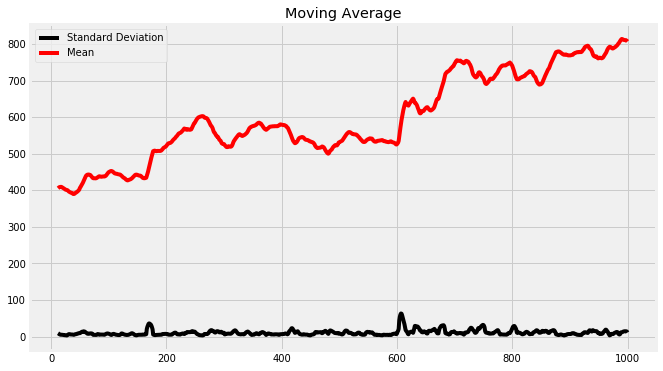

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
# df_log = np.log(data)
moving_avg = data.value.rolling(12).mean()
std_dev = data.value.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

# Solution to Question 14 :

The Centered moving average is done to visualize the data set and not for forecasting. 
It suppresses the seasonality and noise which makes the trend more visible. 
With use of CMA the future observations are unknown at the time of forecasting. 

# Solution to Question 15 :

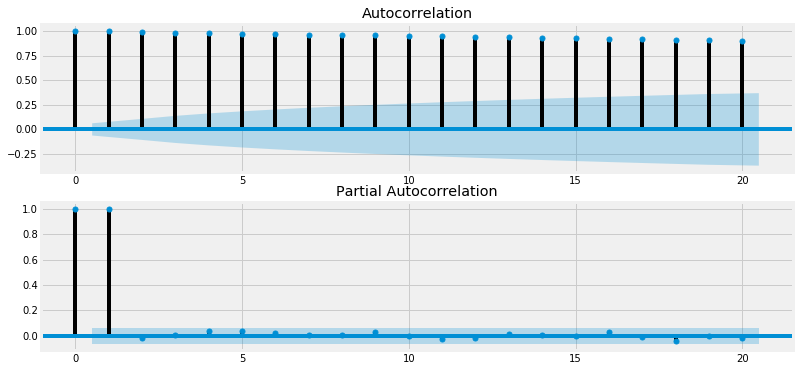

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(data.value.dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(data.value.dropna(), ax=ax[1], lags=20)

Observations :
As we can see, there are several spikes above the blue region, meaning there are correlations at these lags spread from 1 to 20

# Answer to Question : 16

An autocorrelation (ACF) plot represents the autocorrelation of the series with lags of itself.
A partial autocorrelation (PACF) plot represents the amount of correlation between a series and a lag of itself that is not explained by correlations at all lower-order lags.

ACF plot is a bar plot of coefficient of correlation between time series and lag. 
If a data is Stationary, the ACF plot will help to drop to zero quickly. 
If the data is not stationary, then the ACF plot will slowly help to drop to Stationary. 
Also, the value at Lag1 is usually large and positive for stationary data. 

Ideally, we want no correlation between the series and lags of itself. 
Graphically speaking, we would like all the spikes to fall in the blue region. ( As we see above )

# Answer to Question : 17

In [ ]:

# It is time dependent. 
# So the basic assumption of a linear regression model that the observations are independent doesn't hold in this case.


# Answer to Question : 18

In [32]:
data=data.value

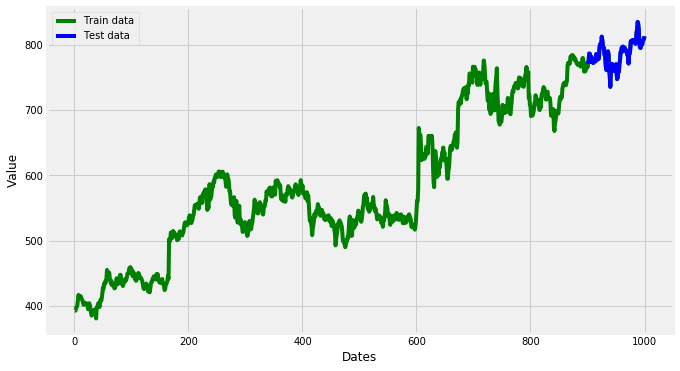

In [33]:
train_data, test_data = data[3:int(len(data)*0.9)], data[int(len(data)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Value')
plt.plot(data, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [34]:
test_data.describe()

count    100.000000
mean     786.890499
std       18.913688
min      736.080017
25%      773.797516
50%      786.900024
75%      799.862503
max      835.669983
Name: value, dtype: float64

# Answer to Question 19:

These three parameters account for seasonality, trend, and noise in data
ARIMA models are made of three parts:
i) A weighted sum of lagged values of the series (Auto-regressive (AR) part)
ii) A weighted sum of lagged forecasted errors of the series (Moving-average (MA) part)
iii) A difference of the time series (Integrated (I) part)

An ARIMA model is often noted ARIMA(p, d, q) where p represents the order of the AR part, d the order of differencing (“I” part), and q the order of the MA term.

# Answer to Question 20:

In [35]:
model = ARIMA(train_data, order=(0, 1, 2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

C:\Users\VISHAL\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\VISHAL\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  896
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -3220.360
Method:                       css-mle   S.D. of innovations              8.804
Date:                Sun, 29 Mar 2020   AIC                           6448.721
Time:                        01:58:20   BIC                           6467.912
Sample:                             1   HQIC                          6456.054
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4103      0.302      1.358      0.175      -0.182       1.003
ma.L1.D.value     0.0307      0.034      0.916      0.360      -0.035       0.097
ma.L2.D.value    -0.0033      0.036     

# Answer to Question 21:

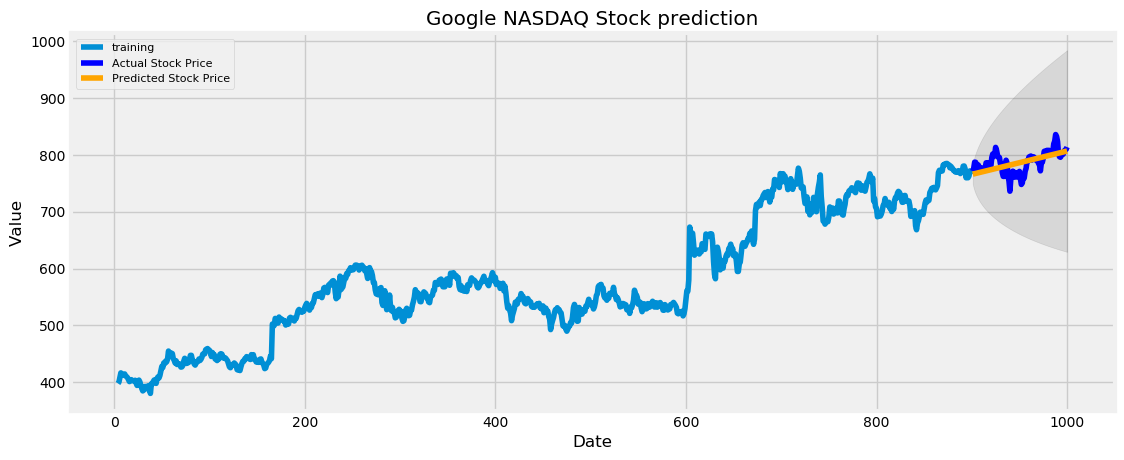

In [38]:
# Forecast
fc, se, conf = fitted.forecast(100, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Google NASDAQ Stock prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Answer to Question : 22

In [36]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=6445.591, BIC=6455.187, Time=0.294 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=6446.737, BIC=6461.131, Time=0.099 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=6446.729, BIC=6461.123, Time=0.195 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=6445.534, BIC=6450.332, Time=0.022 seconds
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=6448.727, BIC=6467.919, Time=0.283 seconds
Total fit time: 1.032 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  897
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3221.767
Date:                Sun, 29 Mar 2020   AIC                           6445.534
Time:                        01:58:49   BIC                           6450.332
Sample:                             0   H

# Answer to  Question : 23

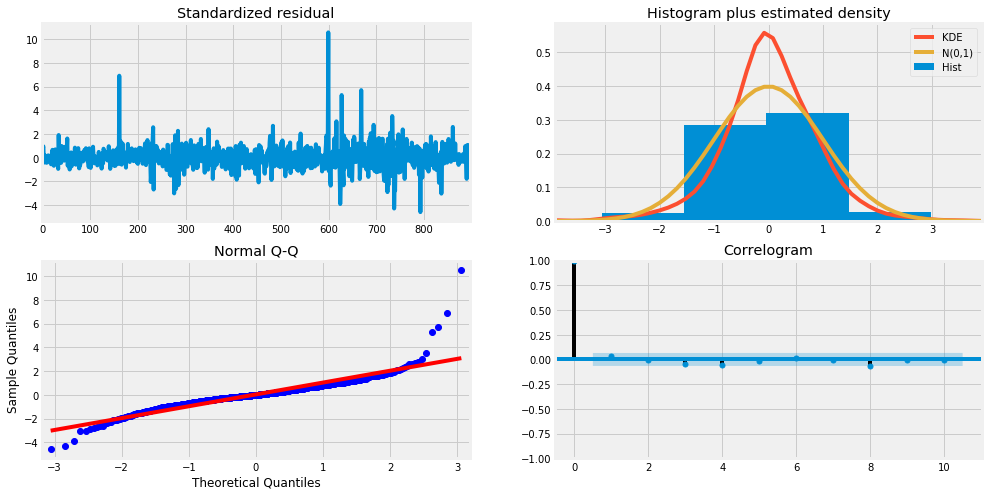

In [11]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.
Top Right: The density plot suggest normal distribution with mean zero.
Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.
Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.
Overall, it seems to be a good fit. Let’s start forecasting the stock prices.

In [14]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 266.8263779398297
MAE: 12.889071412010153
RMSE: 16.334821025644256
MAPE: 0.016478401501446048


Around 1.7% MAPE(Mean Absolute Percentage Error) implies the model is about 98.3% accurate in predicting the test set observations.